In [93]:
#Based on Aki Taanila's Tilastoapu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [94]:
# Open the data
df = pd.read_excel('ShopSatisfactionSurveyData.xlsx')

## Part: List the first few lines

In [95]:
df.head()

,H,1,2,3,4,5,6,7,8,9
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


## Part: See if there are any missing values in the data (However, you don't have to do anything about them now)

In [96]:
df.isnull().sum()

H    0
1    0
2    0
3    0
4    0
5    0
6    2
7    1
8    0
9    0
dtype: int64

## Part: (Re)name the columns according to the explanations found in the Excel file

In [97]:
df.columns = ['H', 'gender', 'age', 'family_size', 'house', 'education', 'net_income', 'purchases', 'sat_product_range', 'sat_price_level']

In [98]:
df.head()

,H,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


## Part: If necessary, delete any columns that you think are unnecessary

In [99]:
df=df.drop(['H'], axis=1)

In [100]:
df.head()

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,34,4,1,4,2960.0,4.0,3,2
1,1,67,1,1,1,980.0,1.0,5,2
2,2,46,3,3,5,3500.0,4.0,2,4
3,1,22,2,2,3,860.0,1.0,5,3
4,2,30,5,2,4,3380.0,4.0,2,3


## Part: Print a summary of the variables

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             102 non-null    int64  
 1   age                102 non-null    int64  
 2   family_size        102 non-null    int64  
 3   house              102 non-null    int64  
 4   education          102 non-null    int64  
 5   net_income         100 non-null    float64
 6   purchases          101 non-null    float64
 7   sat_product_range  102 non-null    int64  
 8   sat_price_level    102 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.3 KB


In [102]:
df.describe()

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,101.000000,102.000000,102.000000
mean,1.313725,41.176471,2.705882,1.745098,3.205882,2365.700000,2.584158,3.500000,2.754902
std,0.466298,12.779479,1.583255,0.684861,1.402531,960.653455,1.151237,1.149688,0.969192
min,1.000000,19.000000,1.000000,1.000000,1.000000,770.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,2.000000,1667.500000,2.000000,3.000000,2.000000
50%,1.000000,39.500000,2.000000,2.000000,4.000000,2205.000000,2.000000,3.000000,3.000000
75%,2.000000,50.000000,4.000000,2.000000,4.000000,2990.000000,3.000000,5.000000,3.000000
max,2.000000,72.000000,7.000000,3.000000,5.000000,4850.000000,5.000000,5.000000,5.000000


Text(0.5, 0, 'Net house income, n=100')

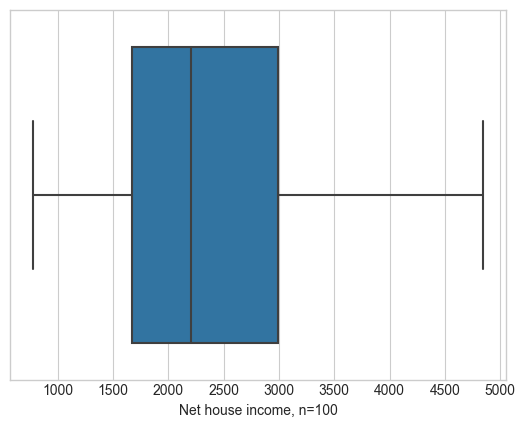

In [103]:
ax3 = sns.boxplot(x = df['net_income'])

ax3.set_xlabel('Net house income, n=' + str(df['net_income'].count()))

In [104]:
df.count()

gender               102
age                  102
family_size          102
house                102
education            102
net_income           100
purchases            101
sat_product_range    102
sat_price_level      102
dtype: int64

In [105]:
for var in df:
    print(var, df[var].unique())

gender [1 2]
age [34 67 46 22 30 40 26 72 20 37 50 33 48 29 42 36 62 58 49 27 32 52 28 39
 45 21 57 31 38 55 19 68 35 54 24 44 51 56 65 25 60 69 43]
family_size [4 1 3 2 5 6 7]
house [1 3 2]
education [4 1 5 3 2]
net_income [2960.  980. 3500.  860. 3380. 2330. 3660. 2220.  820. 3800. 3030. 2920.
 2640. 2290. 4200. 3270. 1310. 1870. 3970. 2240. 3450. 2190. 1680. 2800.
 3220. 4620. 2450.  890. 3340. 1490. 2990. 2100. 1960. 4080. 2150.   nan
 1120. 1610. 1450. 1630. 3430. 2080. 3150. 1400. 1730. 1980. 1820. 2010.
 1910. 1280. 2680. 3240. 4670.  770. 3730. 2470. 1070. 2120. 2710.  930.
 2780. 2750. 1100. 4850. 1590. 1380. 1700. 4430.]
purchases [ 4.  1.  3.  2.  5. nan]
sat_product_range [3 5 2 4 1]
sat_price_level [2 4 3 1 5]


In [106]:
df.nlargest(n = 3, columns = 'age')

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
7,1,72,2,1,2,2220.0,2.0,5,3
91,1,69,1,2,1,1100.0,1.0,5,2
37,1,68,1,1,2,1120.0,1.0,5,3


In [107]:
df.nsmallest(n = 3, columns = 'age')

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
36,2,19,5,1,3,NaN,NaN,4,1
8,2,20,1,2,3,820.0,1.0,5,1
53,1,20,4,1,3,NaN,3.0,3,1


## Part: Investigate a few qualitative variables and generate frequency table(s) for their values



In [108]:
df1=pd.crosstab(df['education'], 'Count')

In [109]:
df1

col_0,Count
education,
1,16
2,22
3,10
4,33
5,21


In [110]:
df1.index=['Primary school','Vocational school or similar','Secondary school graduate','Applied science university','Other university']
df1

col_0,Count
Primary school,16
Vocational school or similar,22
Secondary school graduate,10
Applied science university,33
Other university,21


In [111]:
df1.columns.name=''

In [112]:
df1

,Count
Primary school,16
Vocational school or similar,22
Secondary school graduate,10
Applied science university,33
Other university,21


## Part: Draw a graphs based on the frequency tables

<AxesSubplot:>

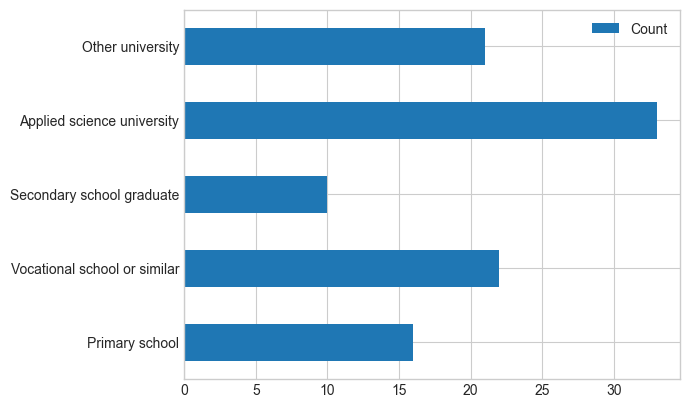

In [113]:
df1.plot.barh()

Text(0.5, 0, 'Count')

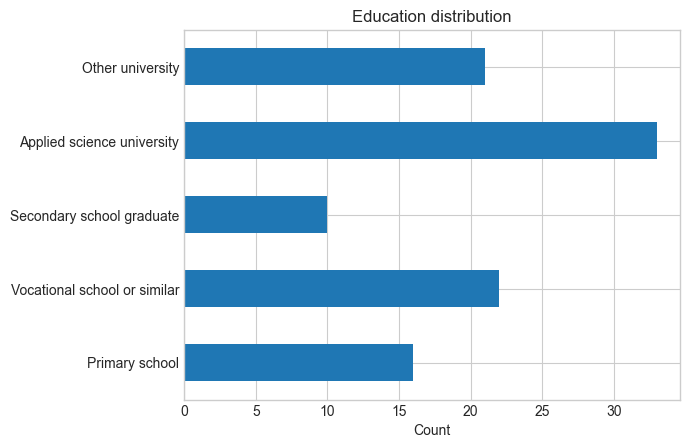

In [114]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count')

In [115]:
sum(df1['Count'])

102

Text(0.5, 0, 'Count, N=102')

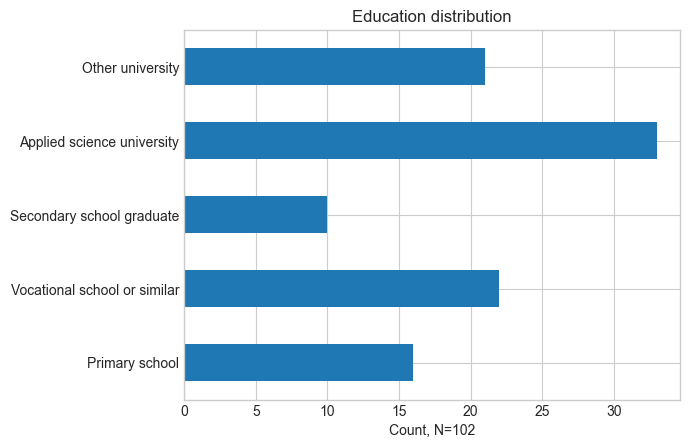

In [116]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

## Part: Instead of using frequencies, use percentages

In [117]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df2.columns.name = ''
df2


,Count,%
Primary school,16,15.686275
Vocational school or similar,22,21.568627
Secondary school graduate,10,9.803922
Applied science university,33,32.352941
Other university,21,20.588235


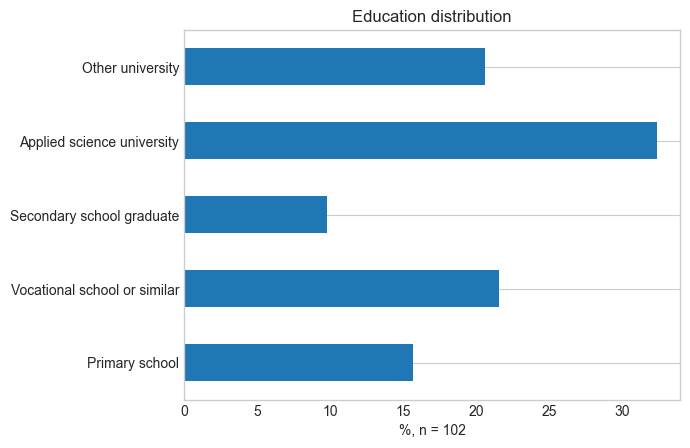

In [118]:
df2['%'].plot.barh(zorder = 2)

plt.title('Education distribution')

plt.xlabel('%, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

## Part: Create some classification for quantitative variable

In [119]:
min(df['net_income'])

770.0

In [120]:
max(df['net_income'])

4850.0

In [121]:
bins = [500, 1000, 2000, 3000, 4000, 7000]

In [122]:
df['income_class'] = pd.cut(df['net_income'], bins = bins)

In [123]:
df

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level,income_class
0,1,34,4,1,4,2960.0,4.0,3,2,"(2000, 3000]"
1,1,67,1,1,1,980.0,1.0,5,2,"(500, 1000]"
2,2,46,3,3,5,3500.0,4.0,2,4,"(3000, 4000]"
3,1,22,2,2,3,860.0,1.0,5,3,"(500, 1000]"
4,2,30,5,2,4,3380.0,4.0,2,3,"(3000, 4000]"
...,...,...,...,...,...,...,...,...,...,...
97,1,38,1,2,4,1380.0,1.0,4,3,"(1000, 2000]"
98,1,56,2,2,1,1700.0,2.0,3,3,"(1000, 2000]"
99,1,42,5,1,5,4430.0,5.0,2,4,"(4000, 7000]"
100,2,36,1,2,1,1100.0,1.0,5,1,"(1000, 2000]"


In [124]:
df3 = pd.crosstab(df['income_class'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100

In [125]:
df3

,Count,%
income_class,,
"(500, 1000]",6,6.0
"(1000, 2000]",34,34.0
"(2000, 3000]",36,36.0
"(3000, 4000]",17,17.0
"(4000, 7000]",7,7.0


In [126]:
type(df3.index.values[0])

pandas._libs.interval.Interval

In [127]:
# Note, that income column has now values of type Interval!
# We would like to add row "Total" into the index, but the Index can contain only one type of values
# for that reason we need to change the type of index elements to be string!

df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

,Count,%
income_class,,
"(500, 1000]",6.0,6.0
"(1000, 2000]",34.0,34.0
"(2000, 3000]",36.0,36.0
"(3000, 4000]",17.0,17.0
"(4000, 7000]",7.0,7.0
Total,100.0,100.0


In [128]:
type(df3.index.values[0])

str

In [129]:
# Finalizing the layout
df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
income_class,,
"(500, 1000]",6,6.0 %
"(1000, 2000]",34,34.0 %
"(2000, 3000]",36,36.0 %
"(3000, 4000]",17,17.0 %
"(4000, 7000]",7,7.0 %
Total,100,100.0 %


## Part: Also create Histograms using the counts and using percentages

 - let's cover the counts part first

Text(0, 0.5, 'Count, n=100')

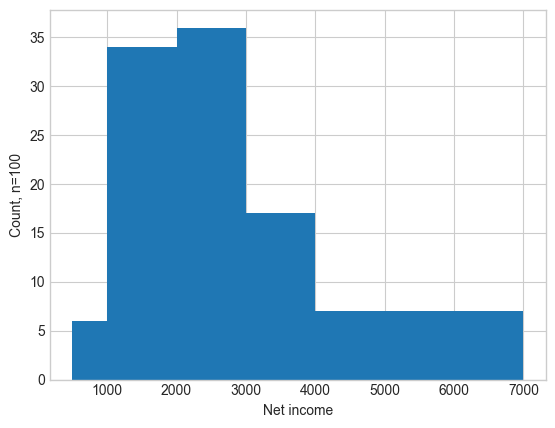

In [130]:
df['net_income'].hist(bins = bins)

plt.xlabel('Net income')
plt.ylabel('Count, n=' + str(n))

- Then let's cover percentages

Text(0, 0.5, '%, n=100')

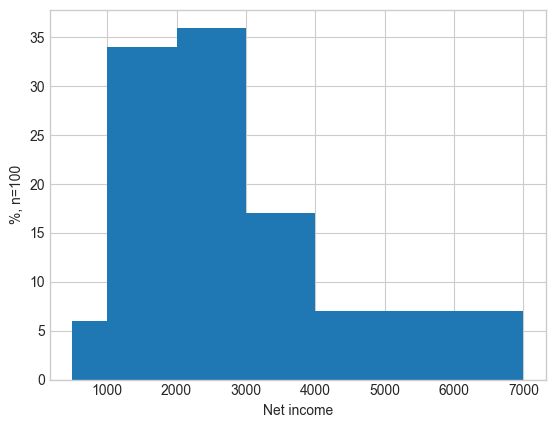

In [131]:
df['net_income'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('Net income')
plt.ylabel('%, n=' + str(n))

## So, now repeating and when ready, then move to analyze variables in pairs

---

## Then, let's continue

In [132]:
# let's check whether education and gender has some dependencies

## Part: Present the results of the cross-tabulations in tables and graphically

In [133]:
df4 = pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100
df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df4.columns = ['woman', 'man']

In [134]:
df4

,woman,man
Primary school,14.285714,18.750
Vocational school or similar,20.000000,25.000
Secondary school graduate,10.000000,9.375
Applied science university,35.714286,25.000
Other university,20.000000,21.875


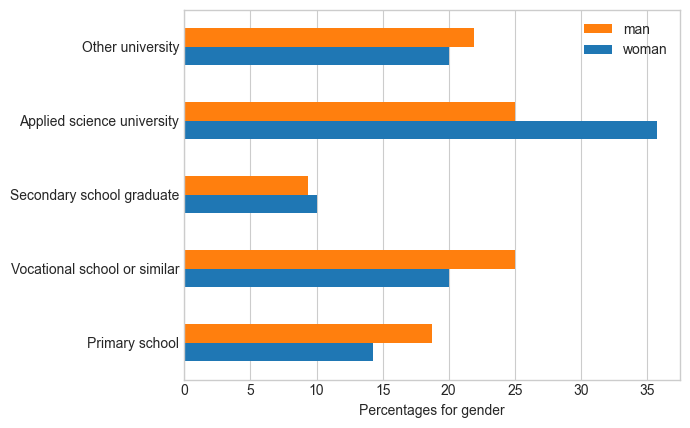

In [135]:
df4.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

In [136]:
# Exercise for you, how to get the n values for both gender??

## And now the last two parts in Exercise 2

## Is the dependence observed in cross-tabulation statistically significant?

The dependencies observed in the sample may be too small to be generalized to the wider population from which the sample is taken. This may be a dependence caused by (random) sampling error.

Dependence is said to be significant if it allows a generalization to be made to the wider population from which the sample is taken. You can test the significance of the dependence by calculating the so-called p-value. The lower the p-value, the more significant the dependence. Generally, p-values less than 0.05 (5%) are considered indicative of significant dependence.

You can calculate the p-value associated with cross-tabulation with the chi-square test (chi2_contingency). The values returned by the test are chi-square, p-value, and number of degrees of freedom (df, or degrees of freedom).

# Important note!!
The following test must be done for the counts table, not for the percentages table, Hence, the df4 is not the table to use the test below!

So compare the next cell with the cell above, where we defined df4

In [137]:
df5 = pd.crosstab(df['education'], df['gender'])
df5.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df5.columns = ['woman', 'man']

In [138]:
from scipy.stats import chi2_contingency


chi2_contingency(df5)

(1.3590340909090908,
 0.8512829058809862,
 4,
 array([[10.98039216,  5.01960784],
        [15.09803922,  6.90196078],
        [ 6.8627451 ,  3.1372549 ],
        [22.64705882, 10.35294118],
        [14.41176471,  6.58823529]]))

## Interpretation

Since the p-value is 0.85 it is not small enough to state the there would be some dependency in education levels and genders.